Random Placement of APs, UEs, and Target Positions

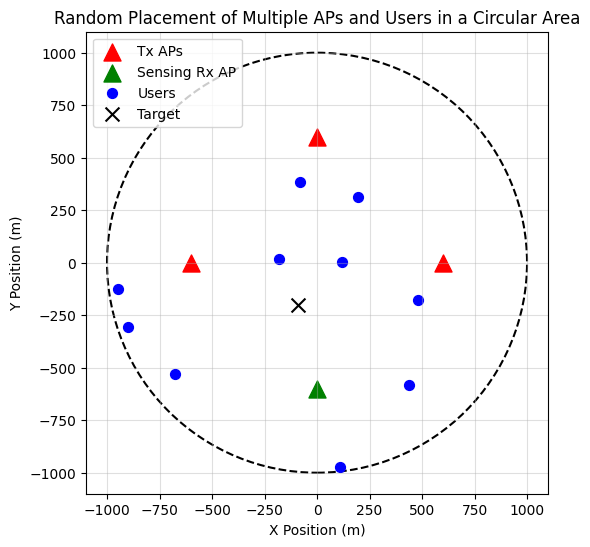

In [1]:
# random placements:
import numpy as np
import matplotlib.pyplot as plt

def find_sensingRxAP(ap_positions, target_position):
  distances = np.linalg.norm(ap_positions - np.tile(target_position.reshape(2,1), ap_positions.shape[1]), axis=0)
  min_distance_index = np.argmin(distances)
  return min_distance_index

def generate_AP_positions(N_ap, radius, angle_shift_deg=0):
  ap_origin_distance = radius
  ap_origin_angles_deg = [i*360/N_ap+angle_shift_deg for i in range(N_ap)]
  ap_origin_angles_rad = np.deg2rad(ap_origin_angles_deg)
  ap_positions = ap_origin_distance * np.array([np.cos(ap_origin_angles_rad), np.sin(ap_origin_angles_rad)])
  return ap_positions

def generate_UE_positions(N_ue, radius, random_state=None):
  if random_state is not None:
    np.random.seed(random_state)
  ue_origin_distances = radius * np.sqrt(np.random.uniform(0, 1, N_ue))
  ue_origin_angles_deg = np.random.uniform(0, 360, N_ue)
  ue_origin_angles_rad = np.deg2rad(ue_origin_angles_deg)
  ue_positions = ue_origin_distances * np.array([np.cos(ue_origin_angles_rad), np.sin(ue_origin_angles_rad)])
  return ue_positions

def generate_target_positions(radius, N_target=1, random_state=None):
  if random_state is not None:
    np.random.seed(random_state)
  target_distances = radius * np.sqrt(np.random.uniform(0, 1, N_target))
  target_angles_deg = np.random.uniform(0, 360)
  target_angles_rad = np.deg2rad(target_angles_deg)
  target_positions = target_distances * np.array([np.cos(target_angles_rad), np.sin(target_angles_rad)])
  return target_positions

# Parameters
N_ap        = 4
N_ue        = 10
env_radius  = 1000

fig_margin_ratio  = 0.1
SHOW_ENV_CIRCLE   = True
SHOW_AP_CIRCLE    = False

# Place APs and UEs and target
ap_radius       = env_radius * 0.6
ap_positions    = generate_AP_positions(N_ap, ap_radius)
ue_positions    = generate_UE_positions(N_ue, env_radius, random_state=12)
target_position = generate_target_positions(env_radius, random_state=78)

# Find sensing receive AP (closest to target)
sensingRxAP_index = find_sensingRxAP(ap_positions, target_position)

# Plotting
circle = plt.Circle((0, 0), env_radius, color='black', fill=False, linestyle='--', linewidth=1.5)
circle1 = plt.Circle((0, 0), ap_radius, color='black', fill=False, linestyle='--', linewidth=1)
fig, ax = plt.subplots(figsize=(6, 6))
if SHOW_ENV_CIRCLE: ax.add_artist(circle)
if SHOW_AP_CIRCLE: ax.add_artist(circle1)
LABELED = False
for i in range(N_ap):
  if i == sensingRxAP_index:
    ax.scatter(ap_positions[0,i], ap_positions[1,i], marker='^', color='green', s=150, label='Sensing Rx AP')
  else:
    if LABELED:
      ax.scatter(ap_positions[0,i], ap_positions[1,i], marker='^', color='red', s=150)
    else:
      ax.scatter(ap_positions[0,i], ap_positions[1,i], marker='^', color='red', s=150, label='Tx APs')
      LABELED = True
ax.scatter(ue_positions[0,:], ue_positions[1,:], marker='o', color='blue', s=50, label='Users')
ax.scatter(target_position[0], target_position[1], marker='x', color='black', s=100, label='Target')
ax.set_xlabel('X Position (m)')
ax.set_ylabel('Y Position (m)')
ax.set_title('Random Placement of Multiple APs and Users in a Circular Area')
ax.legend(loc='upper left', fontsize=10)
ax.grid(True, alpha=0.4)
fig_margin = fig_margin_ratio * env_radius
ax.set_xlim(-env_radius-fig_margin, env_radius+fig_margin)
ax.set_ylim(-env_radius-fig_margin, env_radius+fig_margin)
ax.set_aspect('equal', adjustable='box')
plt.show()